In [1]:
import pandas as pd

df_wage = pd.read_csv('/Users/jugalmarfatia/Documents/summer2018/RA Work/wage_gap/Wage_Gap/data/ipumsi_00004.csv')

df_election_winner = pd.read_csv('/Users/jugalmarfatia/Documents/summer2018/RA Work/wage_gap/Wage_Gap/data/state_election_winner.csv')

In [2]:
df_election_winner.sort_values(['year']).year.unique()

array([1977. , 1978. , 1979. , 1980. , 1982. , 1983. , 1984. , 1985. ,
       1987. , 1989. , 1990. , 1991. , 1992. , 1993. , 1994. , 1995. ,
       1996. , 1997. , 1998. , 1999. , 2000. , 2001. , 2002. , 2003. ,
       2004. , 2005. , 2005.1, 2006. , 2007. , 2008. , 2009. , 2010. ,
       2011. , 2012. , 2013. , 2014. , 2015. ])

In [3]:
df_wage.head()

,COUNTRY,YEAR,SAMPLE,SERIAL,HHWT,URBAN,REGIONW,GEOLEV1,GEOLEV2,PERNUM,...,RELIGIOND,SCHOOL,LIT,EDATTAIN,EDATTAIND,YRSCHOOL,EMPSTAT,EMPSTATD,LABFORCE,INCWAGE
0,356,1983,356198341,1000,1159.0,1,33,356028,NaN,1,...,3000.0,2,2,3,311,11.0,1,110,2,155.0
1,356,1983,356198341,1000,1159.0,1,33,356028,NaN,2,...,3000.0,2,2,2,221,10.0,3,310,1,0.0
2,356,1983,356198341,1000,1159.0,1,33,356028,NaN,3,...,3000.0,1,2,1,120,1.0,3,330,9,0.0
3,356,1983,356198341,2000,1159.0,1,33,356028,NaN,1,...,3000.0,2,1,1,110,0.0,1,110,2,0.0
4,356,1983,356198341,2000,1159.0,1,33,356028,NaN,2,...,3000.0,2,1,1,110,0.0,3,310,1,0.0


In [4]:
df_election_winner.loc[df_election_winner.year.isin((1977, 1978, 1979, 1980, 1982, 1983)),'census_year'] = 1983
df_election_winner.loc[df_election_winner.year.isin((1984, 1985, 1987)),'census_year'] = 1987 
df_election_winner.loc[df_election_winner.year.isin((1989, 1990, 1991, 1992, 1993)),'census_year'] = 1993
df_election_winner.loc[df_election_winner.year.isin((1996, 1997, 1998, 1999)),'census_year'] = 1999
df_election_winner.loc[df_election_winner.year.isin((1996, 1997, 1998, 1999)),'census_year'] = 1999
df_election_winner.loc[df_election_winner.year.isin((2000, 2001, 2002, 2003, 2004)),'census_year'] = 2004
df_election_winner.loc[df_election_winner.year.isin(( 2005, 2006, 2007, 2008, 2009)),'census_year'] = 2009
df_election_winner.loc[df_election_winner.year.isin(( 2011, 2012, 2013, 2014)),'census_year'] = 0


In [5]:
df_election_winner['female'] = (df_election_winner['cand_sex'] =='F').astype(int)

In [6]:
df_election_perecent_f = df_election_winner.groupby(['census_year', 'State', 'GEOLEV1']).mean()
# df_election_perecent_f = df_election_perecent_f['female']

In [7]:
df_election_perecent_f.head()

year       ac_no    totvotpoll  \
census_year State             GEOLEV1                                      
0.0         Andhra Pradesh    356028.0  2014.0  147.500000  78038.469388   
            Arunachal Pradesh 356012.0  2014.0   28.309859   3798.211268   
            Assam             356018.0  2011.0   63.500000  50035.777778   
            Gujarat           356024.0  2012.0   91.500000  77361.307692   
            Haryana           356006.0  2014.0   45.500000  55012.122222   

                                           Code     female  
census_year State             GEOLEV1                       
0.0         Andhra Pradesh    356028.0  356028.0  0.091837  
            Arunachal Pradesh 356012.0  356012.0  0.028169  
            Assam             356018.0  356018.0  0.111111  
            Gujarat           356024.0  356024.0  0.087912  
            Haryana           356006.0  356006.0  0.144444

In [8]:
import weightedcalcs as wc

def wage_ratio(df, geolev1, year, var_name):
    # Keep only data for the country specified
    df = df.loc[(df['GEOLEV1'] == geolev1) & (df['YEAR'] == year)].reset_index()
    
    # Labor force particiption rate of income > 0
    lf_part_rate = df.loc[df[var_name] > 0]["PERWT"].sum()/df["PERWT"].sum()    
    
    # Seperate men and women dataframe
    men = df.loc[df['SEX'] == 1]
    women = df.loc[df['SEX'] == 2]
    
    # Create output/ return table 
    d = {'GEOLEV1': [geolev1], 'income_type': [var_name], 'year': [round(df['YEAR'].mean(), 0)], 'lf_part_rate': [lf_part_rate]}
    
    # Define weight variable
    calc = wc.Calculator("PERWT")
    
    # Make output table as pandas object
    final_df = pd.DataFrame(data=d)
    
    # Calculate men and women labor force participation rate
    final_df['men_lf_part_rate'] = men.loc[men[var_name] > 0]["PERWT"].sum()/men["PERWT"].sum()
    final_df['women_lf_part_rate'] = women.loc[women[var_name] > 0]["PERWT"].sum()/women["PERWT"].sum()
    
    # Keep only person with income > 0 for ratio calculation
    men = men.loc[df[var_name] > 0]
    women = women.loc[df[var_name] > 0]
    
    # Calculate sample size for men and women
    final_df['men_sample_size'] = men[var_name].count()
    final_df['women_sample_size'] = women[var_name].count()
    
    # Calculate mean and std of income
    final_df['men income: mean (std)'] = str(round(calc.mean(men, var_name))) + ' (' + str(round(calc.std(men, var_name))) + ')'
    final_df['women income: mean (std)'] = str(round(calc.mean(women, var_name))) + ' (' + str(round(calc.std(women, var_name))) + ')' 
    
    # Calculate ratios at different percentiles
    final_df['mean_ratio'] = round(calc.mean(women, var_name)/ calc.mean(men, var_name), 3)
    final_df['10_percentile'] = round(calc.quantile(women, var_name, 0.1) 
                                      / calc.quantile(men, var_name, 0.1) ,3)
    
    final_df['25_percentile'] = round(calc.quantile(women, var_name, 0.25) 
                                      / calc.quantile(men, var_name, 0.25) ,3)
    
    final_df['90_percentile'] = round(calc.quantile(women, var_name, 0.90) 
                                      / calc.quantile(men, var_name, 0.90) ,3)
    
    # return output as pandas table 
    return final_df

In [9]:
import numpy as np
df_wage = df_wage[df_wage['YEAR'] != 2009]
df_wage_ratio_final = pd.DataFrame()

for i in df_wage['GEOLEV1'].unique():
    for j in df_wage['YEAR'].unique():
        x = wage_ratio(df_wage, i, j ,'INCWAGE')
        df_wage_ratio_final = df_wage_ratio_final.append(x)


In [10]:
df_wage_ratio_final = df_wage_ratio_final.set_index(['GEOLEV1', 'year'])

In [38]:
df_election_perecent_f.reset_index().head()

,GEOLEV1,year,census_year,State,ac_no,totvotpoll,Code,female
0,356028.0,1983.0,1983.0,Andhra Pradesh,147.500000,34869.797619,356028.0,0.035714
1,356012.0,1983.0,1983.0,Arunachal Pradesh,15.500000,2891.766667,356012.0,0.016667
2,356018.0,1983.0,1983.0,Assam,62.770213,13782.906383,356018.0,0.012766
3,356024.0,1983.0,1983.0,Gujarat,91.500000,22989.615385,356024.0,0.027473
4,356006.0,1983.0,1983.0,Haryana,45.500000,22441.477778,356006.0,0.061111


In [12]:
df_election_perecent_f = df_election_perecent_f.drop(columns=['year'])

In [13]:
df_election_perecent_f = df_election_perecent_f.reset_index()

df_election_perecent_f = df_election_perecent_f[df_election_perecent_f['census_year'] != 0]

df_election_perecent_f['year'] = df_election_perecent_f['census_year']

In [14]:
df_election_perecent_f = df_election_perecent_f.set_index(['GEOLEV1', 'year'])

In [15]:
df_election_perecent_f.head()

,,census_year,State,ac_no,totvotpoll,Code,female
GEOLEV1,year,,,,,,
356028.0,1983.0,1983.0,Andhra Pradesh,147.500000,34869.797619,356028.0,0.035714
356012.0,1983.0,1983.0,Arunachal Pradesh,15.500000,2891.766667,356012.0,0.016667
356018.0,1983.0,1983.0,Assam,62.770213,13782.906383,356018.0,0.012766
356024.0,1983.0,1983.0,Gujarat,91.500000,22989.615385,356024.0,0.027473
356006.0,1983.0,1983.0,Haryana,45.500000,22441.477778,356006.0,0.061111


In [24]:
df_final = df_wage_ratio_final.join(df_election_perecent_f)

In [25]:
df_final = df_final[df_final.female >-1]
df_wage_ratio_final.head()

income_type  lf_part_rate  men_lf_part_rate  \
GEOLEV1 year                                                 
356028  1983.0     INCWAGE      0.218272          0.271594   
        1987.0     INCWAGE      0.100623          0.098397   
        1993.0     INCWAGE      0.238962          0.292897   
        1999.0     INCWAGE      0.240169          0.291728   
        2004.0     INCWAGE      0.239234          0.297742   

                women_lf_part_rate  men_sample_size  women_sample_size  \
GEOLEV1 year                                                             
356028  1983.0            0.164160             5623               3048   
        1987.0            0.102870             2743               1878   
        1993.0            0.184976             5241               2679   
        1999.0            0.187460             5369               2890   
        2004.0            0.180831             4614               2521   

               men income: mean (std) women income: mean (std)  mean_ratio  \
GEOLEV1 year                                                                 
356028  1983.0      2921.0 (169014.0)       40048.0 (631442.0)      13.709   
        1987.0          161.0 (158.0)              46.0 (62.0)       0.288   
        1993.0          195.0 (224.0)             90.0 (111.0)       0.462   
        1999.0          443.0 (557.0)            198.0 (280.0)       0.446   
        2004.0          521.0 (746.0)            238.0 (441.0)       0.457   

                10_percentile  25_percentile  90_percentile  
GEOLEV1 year                                                 
356028  1983.0          0.600          0.536          0.324  
        1987.0          0.467          0.356          0.191  
        1993.0          0.600          0.612          0.286  
        1999.0          0.545          0.571          0.272  
        2004.0          0.556          0.500          0.285

In [27]:
df_final = df_final[df_final.mean_ratio < 2]
# df_final = df_final[df_final.census_year == 2004]

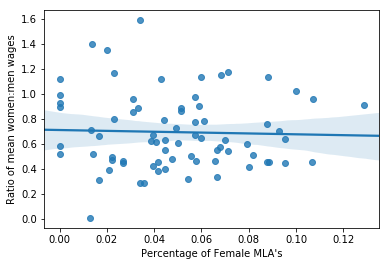

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
g = sns.regplot(np.asarray(df_final['female']), np.asarray(df_final['mean_ratio']))
g.set_xlabel("Percentage of Female MLA's")
g.set_ylabel("Ratio of mean women:men wages")
fig = g.get_figure()
fig.savefig("/Users/jugalmarfatia/Documents/summer2018/RA Work/wage_gap/Wage_Gap/data/female_mlas_wage_ratio.pdf")

# plt.scatter(np.asarray(df_final[['female']]), np.asarray(df_final[['mean_ratio']]))


In [46]:
from linearmodels import PanelOLS
from linearmodels.panel import PooledOLS
import statsmodels.api as sm

exog_vars = ['female']

exog_mean = sm.add_constant(df_final[exog_vars])
mod = PanelOLS(df_final.mean_ratio, exog_mean, entity_effects=True, time_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res.summary)

beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('myreg.tex', 'w')
f.write(beginningtex)
f.write(res.summary.as_latex())
f.write(endtex)
f.close()

                          PanelOLS Estimation Summary                           
Dep. Variable:             mean_ratio   R-squared:                        0.0041
Estimator:                   PanelOLS   R-squared (Between):             -0.0019
No. Observations:                  74   R-squared (Within):               0.0066
Date:                Sun, Nov 04 2018   R-squared (Overall):              0.0005
Time:                        21:36:44   Log-likelihood                    19.271
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      0.2108
Entities:                          29   P-value                           0.6481
Avg Obs:                       2.5517   Distribution:                    F(1,51)
Min Obs:                       0.0000                                           
Max Obs:                       5.0000   F-statistic (robust):             0.1574
                            